In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from dataset.h5_image_dataset import H5ImageDataset
import h5py

In [3]:
exists_path = []
total_min_navie_rmse, total_min_reversed_rmse, total_once_rmse, total_avg_rmse, total_rmse = 0, 0, 0, 0, 0 
count = 0

with open('/workspace/Marigold/results/Gopro_Event_Test.txt', 'r') as f:
    lines = f.readlines()
    lines = [line.strip() for line in lines]


    for line in lines:
        splits = line.split(' ')
        img_name, min_navie_rmse, min_reversed_rmse, once_rmse, avg_rmse = splits

        total_min_navie_rmse += float(min_navie_rmse)
        total_min_reversed_rmse += float(min_reversed_rmse)
        total_once_rmse += float(once_rmse)
        total_avg_rmse += float(avg_rmse)
        total_rmse += min(float(min_navie_rmse), float(min_reversed_rmse))

        if min_navie_rmse > min_reversed_rmse:
            count +=1

print('total_rmse:', total_rmse/len(lines))
print('total_min_navie_rmse:', total_min_navie_rmse/len(lines))
print('total_min_reversed_rmse:', total_min_reversed_rmse/len(lines))
print('total_once_rmse:', total_once_rmse/len(lines))
print('total_avg_rmse:', total_avg_rmse/len(lines))
print(count)


        


total_rmse: 0.02376859504132219
total_min_navie_rmse: 0.023878787878787746
total_min_reversed_rmse: 0.02713774104683183
total_once_rmse: 0.023878787878787746
total_avg_rmse: 0.023878787878787746
108


In [4]:
exists_path = []
total_min_navie_rmse, total_min_reversed_rmse, total_once_rmse, total_avg_rmse, total_rmse = 0, 0, 0, 0, 0 
count = 0

with open('/workspace/Marigold/results/Gopro_Event_Train.txt', 'r') as f:
    lines = f.readlines()
    lines = [line.strip() for line in lines]


    for line in lines:
        splits = line.split(' ')
        img_name, min_navie_rmse, min_reversed_rmse, once_rmse, avg_rmse = splits

        total_min_navie_rmse += float(min_navie_rmse)
        total_min_reversed_rmse += float(min_reversed_rmse)
        total_once_rmse += float(once_rmse)
        total_avg_rmse += float(avg_rmse)
        total_rmse += min(float(min_navie_rmse), float(min_reversed_rmse))

        if min_navie_rmse > min_reversed_rmse:
            count +=1

print('total_rmse:', total_rmse/len(lines))
print('total_min_navie_rmse:', total_min_navie_rmse/len(lines))
print('total_min_reversed_rmse:', total_min_reversed_rmse/len(lines))
print('total_once_rmse:', total_once_rmse/len(lines))
print('total_avg_rmse:', total_avg_rmse/len(lines))
print(count)


        


total_rmse: 0.02316172899465775
total_min_navie_rmse: 0.023170471102477077
total_min_reversed_rmse: 0.02900777076250591
total_once_rmse: 0.023170471102477077
total_avg_rmse: 0.023170471102477077
11


In [1]:
# import h5py
# import numpy as np
# import os
# from PIL import Image
# import matplotlib.pyplot as plt

# root_path = '/workspace/data/GOPRO/test'
# h5_folder = os.listdir(root_path)
# h5_folder.sort()

# total_rmse = 0
# count = 0
# reversed_count = 0

# for h5 in h5_folder[4:5]:
#     h5_path = os.path.join(root_path, h5)
#     h5_name = h5[:-3]   # GOPR0384_11_00
#     with h5py.File(h5_path, 'r') as f:

#         events = f['gen_event']
#         voxels = f['voxels']
#         blur_images = f['images']

#         for event in events:

#             # print(h5_name, event)
#             gen_event = events[f'{event}'][:]  # 이미지 데이터 불러오기
#             gen_event = gen_event.transpose(1,2,0)
#             # normalize gen_event to [-1,1]
#             max_val = np.max(np.abs(gen_event))
#             gen_event = gen_event / max_val 

#             voxel_key = event.replace('image', 'voxel')
#             gt_event = voxels[f'{voxel_key}'][:]
#             gt_event = gt_event.transpose(1,2,0)
#             # normalize gt_event to [-1,1]
#             max_val = np.max(np.abs(gt_event))
#             gt_event = gt_event / max_val

#             # [-1,1] -> [0,1]
#             gen_event = (gen_event + 1) / 2
#             gt_event = (gt_event + 1) / 2

#             diff = gen_event - gt_event
#             diff_power = diff ** 2
#             rmse = np.sqrt(np.mean(diff_power))
#             # if rmse < 0.1:
#             #     continue

#             # print name
#             print(h5_name, event)
#             print(rmse)
#             blur_image = blur_images[f'{event}'][:]
#             blur_image = blur_image.transpose(1,2,0)
#             blur_image = blur_image[:,:,::-1]
#             blur_image = Image.fromarray(blur_image)
#             blur_image.save(f'{h5_name}_{event}.png')
#             # Plot generated events
#             plt.figure(figsize=(10, 5))
#             for i in range(6):
#                 plt.subplot(2, 3, i+1)
#                 plt.imshow(gen_event[:,:,i], cmap='gray')
#                 plt.axis('off')
#                 plt.title(f'Gen Channel {i}')
#             plt.tight_layout()
#             plt.show()

#             # Plot ground truth events  
#             plt.figure(figsize=(10, 5))
#             for i in range(6):
#                 plt.subplot(2, 3, i+1)
#                 plt.imshow(gt_event[:,:,i], cmap='gray')
#                 plt.axis('off')
#                 plt.title(f'GT Channel {i}')
#             plt.tight_layout()
#             plt.show()

#         break
#     break   




# Metric

In [9]:
import h5py
import numpy as np
import os
from PIL import Image

root_path = '/workspace/data/GOPRO/test'
h5_folder = os.listdir(root_path)
h5_folder.sort()

total_rmse = 0
count = 0
reversed_count = 0

for h5 in h5_folder:
    h5_path = os.path.join(root_path, h5)
    h5_name = h5[:-3]   # GOPR0384_11_00
    with h5py.File(h5_path, 'r') as f:

        events = f['gen_event']
        voxels = f['voxels']

        for event in events:
            # print(h5_name, event)
            gen_event = events[f'{event}'][:]  # 이미지 데이터 불러오기
            gen_event = gen_event.transpose(1,2,0)
            # normalize gen_event to [-1,1]
            max_val = np.max(np.abs(gen_event))
            gen_event = gen_event / max_val 


            voxel_key = event.replace('image', 'voxel')
            gt_event = voxels[f'{voxel_key}'][:]
            gt_event = gt_event.transpose(1,2,0)
            # normalize gt_event to [-1,1]
            max_val = np.max(np.abs(gt_event))
            gt_event = gt_event / max_val

            # [-1,1] -> [0,1]
            gen_event = (gen_event + 1) / 2
            gt_event = (gt_event + 1) / 2   

            for i in range(6):
                reversed_gen_event = gen_event[:,:,::-1]

            # calculate rmse
            diff = gen_event - gt_event
            diff_power = diff ** 2
            rmse = np.sqrt(np.mean(diff_power))

            diff_reversed = reversed_gen_event - gt_event
            diff_power_reversed = diff_reversed ** 2
            rmse_reversed = np.sqrt(np.mean(diff_power_reversed))

            if rmse_reversed < rmse:
                reversed_count += 1

            total_rmse += min(rmse, rmse_reversed)
            count += 1
        

print(total_rmse/count)
print(reversed_count)


0.028224303293887688
178


(6, 720, 1280)


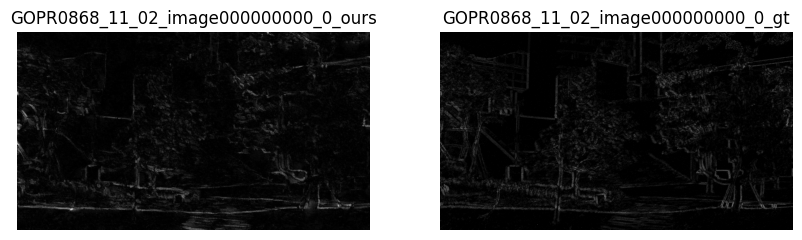

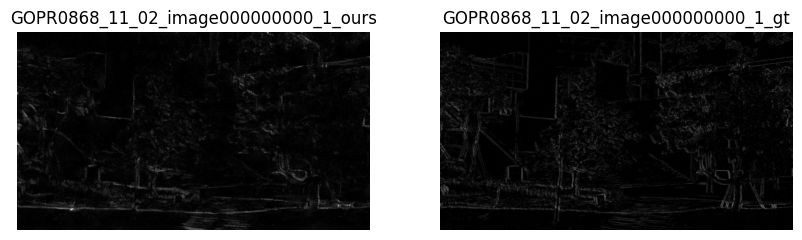

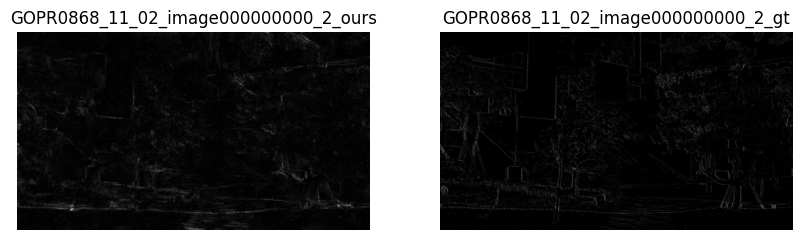

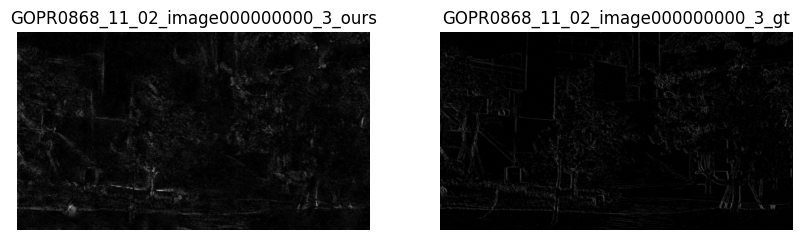

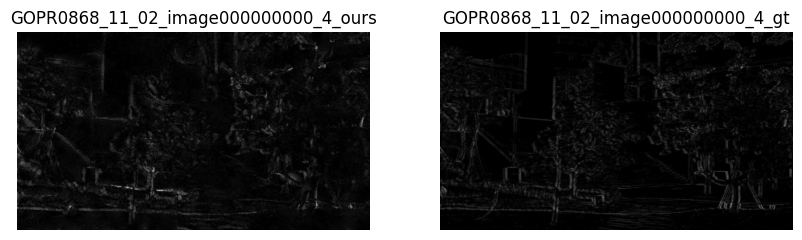

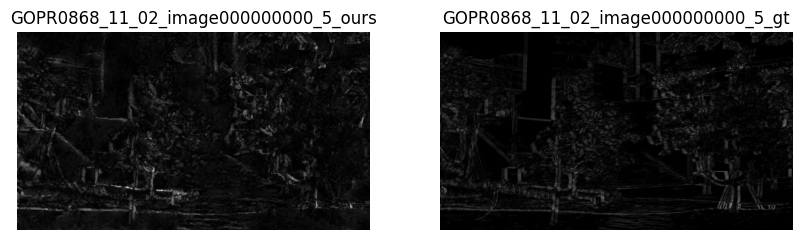

In [15]:
import h5py
import numpy as np
import os
from PIL import Image

root_path = '/workspace/data/GOPRO/train'
h5_folder = os.listdir(root_path)
h5_folder.sort()


for h5 in h5_folder[18:]:
    h5_path = os.path.join(root_path, h5)
    h5_name = h5[:-3]   # GOPR0384_11_00
    with h5py.File(h5_path, 'r') as f:

        events = f['gen_event']
        voxels = f['voxels']

        for event in events:
            # print(h5_name, event)
            gen_event = events[f'{event}'][:]  # 이미지 데이터 불러오기
            gen_event = np.load('/workspace/Marigold/results/Gopro_Event_Train/GOPR0868_11_02/image000000/out.npy')
            gen_event = gen_event.transpose(2,0,1)
            print(gen_event.shape)

            voxel_key = event.replace('image', 'voxel')
            gen_event = gen_event.transpose(1,2,0)

            # normllize gen_event to [-1,1]
            max_val = np.max(np.abs(gen_event))
            gen_event = gen_event / max_val 

            gt_event = voxels[f'{voxel_key}'][:]
            gt_event = gt_event.transpose(1,2,0)
            # normalize gt_event to [-1,1]
            max_val = np.max(np.abs(gt_event))
            gt_event = gt_event / max_val

            # calculate rmse
            diff = gen_event - gt_event
            diff_power = diff ** 2
            rmse = np.sqrt(np.mean(diff_power))


            # plot in grayscale 6 imgs
            for i in range(6):
                out = gen_event[:,:,i]
                out_gt = gt_event[:,:,i]
                # out = (out + 1) / 2 
                # out_gt = (out_gt + 1) / 2
                out = np.abs(out)
                out_gt = np.abs(out_gt)

                out = out * 255
                out_gt = out_gt * 255
                out = out.astype('uint8')
                out_gt = out_gt.astype('uint8')

                out = Image.fromarray(out).convert('L')
                out_gt = Image.fromarray(out_gt).convert('L')

                # plot in 1x2
                fig, axs = plt.subplots(1, 2, figsize=(10, 5))
                axs[0].imshow(out, cmap='gray')  
                axs[0].set_title(f'{h5_name}_{event}_{i}_ours')
                axs[0].axis('off')

                axs[1].imshow(out_gt, cmap='gray')
                axs[1].set_title(f'{h5_name}_{event}_{i}_gt')
                axs[1].axis('off')
                plt.show()
            break

        break
    break           



RMSE: 0.06364761292934418


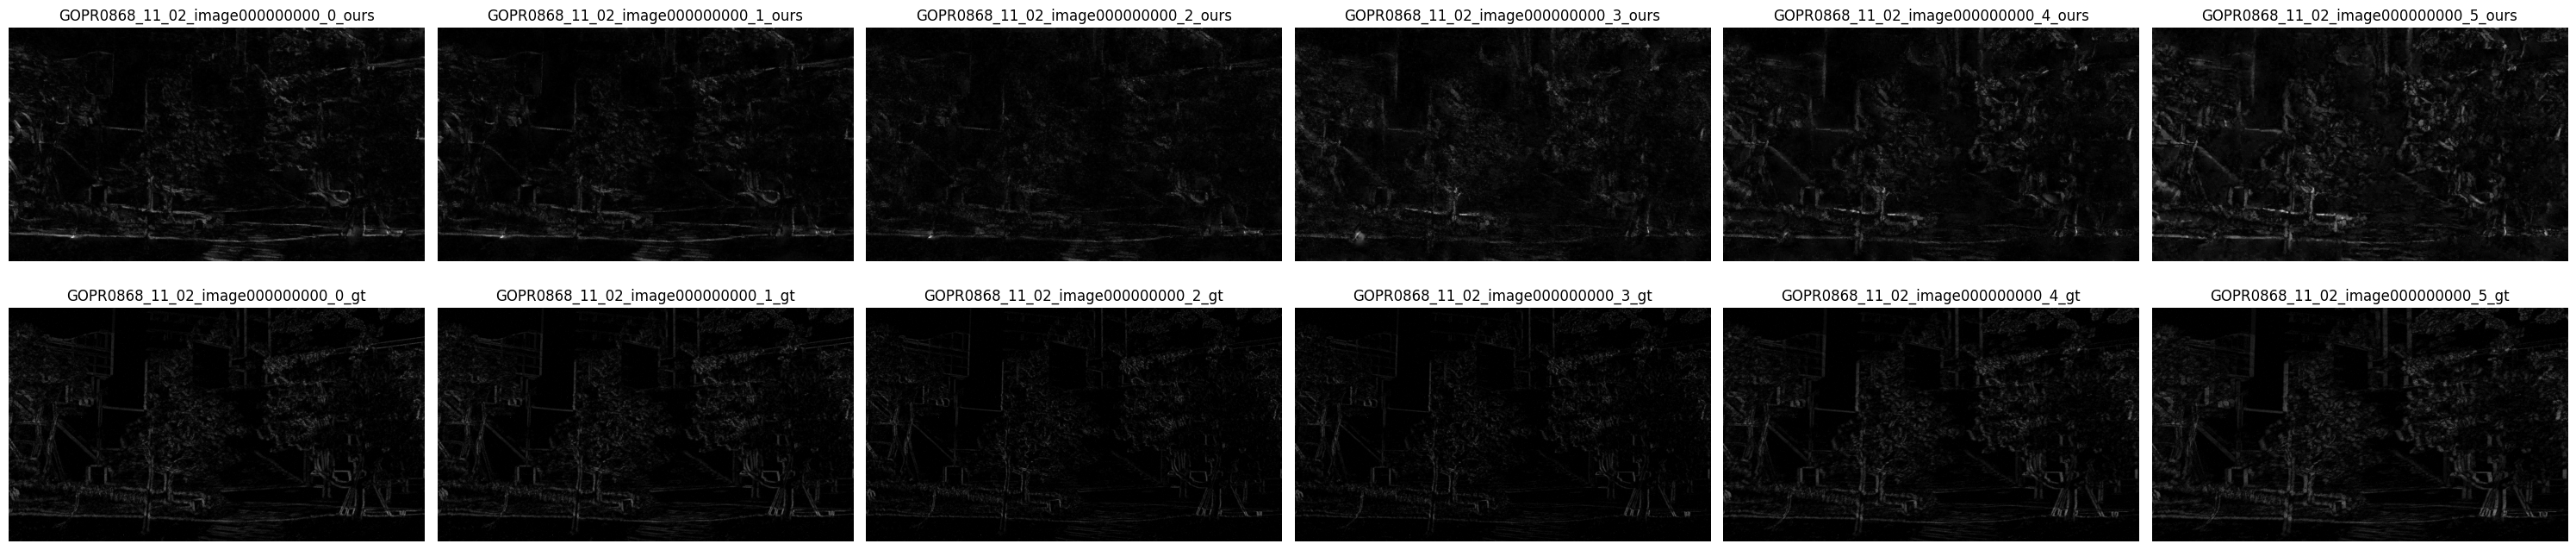

In [23]:
import h5py
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

root_path = '/workspace/data/GOPRO/train'
h5_folder = os.listdir(root_path)
h5_folder.sort()

for h5 in h5_folder[18:]:
    h5_path = os.path.join(root_path, h5)
    h5_name = h5[:-3]   # 예: GOPR0384_11_00
    with h5py.File(h5_path, 'r') as f:
        events = f['gen_event']
        voxels = f['voxels']

        for event in events:
            # gen_event 불러오기
            gen_event = events[f'{event}'][:]  
            # 아래는 예제 경로 사용 (실제로는 위에서 불러온 gen_event를 사용해야 함)
            gen_event = np.load('/workspace/Marigold/results/Gopro_Event_Train/GOPR0868_11_02/image000000/out.npy')
            
            # [H, W, C] -> [C, H, W] 로 변환
            gen_event = gen_event.transpose(2, 0, 1)
            # voxel key 찾기
            voxel_key = event.replace('image', 'voxel')
            
            # 다시 [H, W, C] 로 복원
            gen_event = gen_event.transpose(1, 2, 0)
            max_val = np.max(np.abs(gen_event))
            gen_event = gen_event / max_val  # [-1, 1] 정규화

            # GT 이벤트 불러오기
            gt_event = voxels[f'{voxel_key}'][:]
            gt_event = gt_event.transpose(1, 2, 0)
            max_val = np.max(np.abs(gt_event))
            gt_event = gt_event / max_val  # [-1, 1] 정규화

            # RMSE 계산
            diff = gen_event - gt_event
            rmse = np.sqrt(np.mean(diff ** 2))
            print(f"RMSE: {rmse}")

            # 2행 6열 플롯 설정
            fig, axs = plt.subplots(2, 6, figsize=(30, 7))

            for i in range(6):
                out = gen_event[:, :, i]
                out_gt = gt_event[:, :, i]
                
                # 절댓값을 취한 뒤 [0, 255]로 변환
                out = np.abs(out) * 255
                out_gt = np.abs(out_gt) * 255
                out = out.astype('uint8')
                out_gt = out_gt.astype('uint8')

                # 첫 번째 행에는 out
                axs[0, i].imshow(out, cmap='gray')
                axs[0, i].set_title(f'{h5_name}_{event}_{i}_ours')
                axs[0, i].axis('off')

                # 두 번째 행에는 out_gt
                axs[1, i].imshow(out_gt, cmap='gray')
                axs[1, i].set_title(f'{h5_name}_{event}_{i}_gt')
                axs[1, i].axis('off')

            plt.tight_layout()
            plt.show()
            break
        break
    break


<KeysViewHDF5 ['gen_event', 'images', 'masks', 'sharp_images', 'voxels']>
(720, 1280, 6)
RMSE: 0.07303047925233841


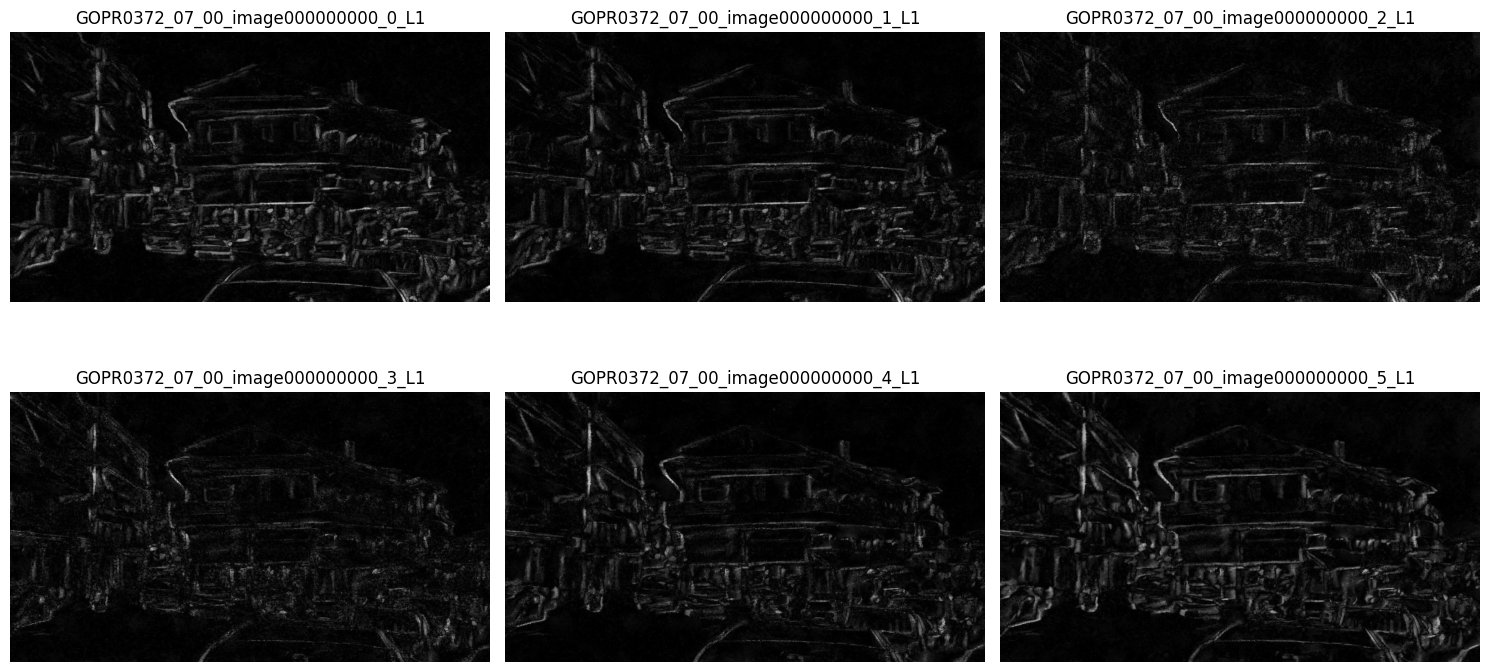

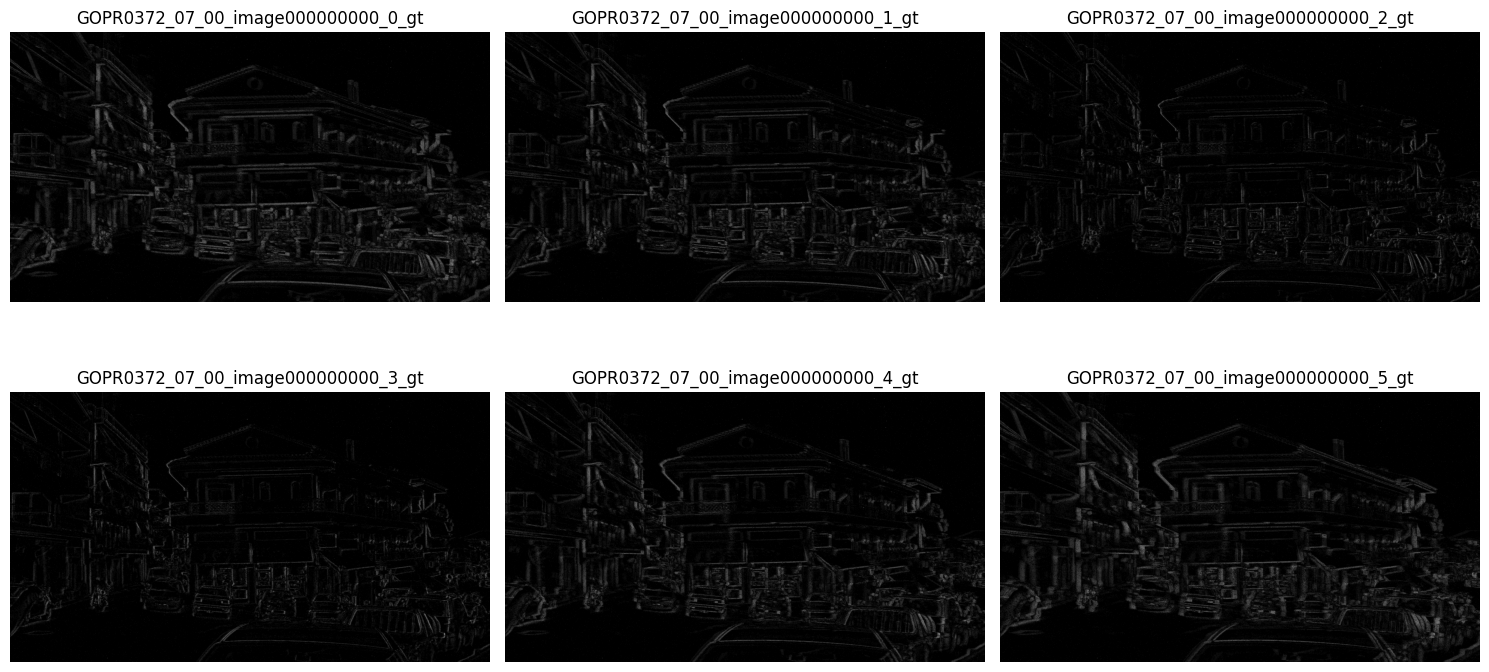

In [5]:
import h5py
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

root_path = '/workspace/data/GOPRO/train'
h5_folder = os.listdir(root_path)
h5_folder.sort()

for h5 in h5_folder[:]:
    h5_path = os.path.join(root_path, h5)
    h5_name = h5[:-3]   # 예: GOPR0384_11_00
    
    with h5py.File(h5_path, 'r') as f:
        events = f['gen_event']
        voxels = f['voxels']
        print(f.keys())
        for event in events:
            # gen_event 불러오기
            gen_event = np.load('/workspace/Marigold/results_B2E_L1/Gopro_Event_Train/GOPR0372_07_00/image000000/out.npy')
            print(gen_event.shape)
            
            # [H, W, C] -> [C, H, W] 로 변환
            gen_event = gen_event.transpose(2, 0, 1)
            voxel_key = event.replace('image', 'voxel')
            
            # [C, H, W] -> [H, W, C] 로 복원
            gen_event = gen_event.transpose(1, 2, 0)
            max_val = np.max(np.abs(gen_event))
            gen_event = gen_event / max_val  # [-1, 1] 정규화

            # GT 이벤트 불러오기
            gt_event = voxels[f'{voxel_key}'][:]
            gt_event = gt_event.transpose(1, 2, 0)
            max_val = np.max(np.abs(gt_event))
            gt_event = gt_event / max_val  # [-1, 1] 정규화

            # RMSE 계산
            diff = gen_event - gt_event
            rmse = np.sqrt(np.mean(diff ** 2))
            print(f"RMSE: {rmse}")

            # -------------------------------------------
            #  out 이미지를 2행 3열(2x3)로 플롯
            # -------------------------------------------
            fig_out, axs_out = plt.subplots(2, 3, figsize=(15, 8))

            for i in range(6):
                # 2행 3열 좌표 계산
                row = i // 3
                col = i % 3

                out = gen_event[:, :, i]
                # 절댓값 취한 뒤 [0, 255] 범위로 변환
                out = np.abs(out) * 255
                out = out.astype('uint8')

                axs_out[row, col].imshow(out, cmap='gray')
                axs_out[row, col].set_title(f'{h5_name}_{event}_{i}_L1')
                axs_out[row, col].axis('off')

            plt.tight_layout()
            plt.show()

            # -------------------------------------------
            #  out_gt 이미지를 2행 3열(2x3)로 플롯
            # -------------------------------------------
            fig_gt, axs_gt = plt.subplots(2, 3, figsize=(15, 8))

            for i in range(6):
                # 2행 3열 좌표 계산
                row = i // 3
                col = i % 3

                out_gt = gt_event[:, :, i]
                out_gt = np.abs(out_gt) * 255
                out_gt = out_gt.astype('uint8')

                axs_gt[row, col].imshow(out_gt, cmap='gray')
                axs_gt[row, col].set_title(f'{h5_name}_{event}_{i}_gt')
                axs_gt[row, col].axis('off')

            plt.tight_layout()
            plt.show()
            
            # 단일 이벤트만 테스트 시 break
            break
        # h5 파일도 한번만 테스트 시 break
        break
    # 상위 for 루프(파일 목록)도 한번만 테스트 시 break
    break


RMSE: 0.07105223834514618


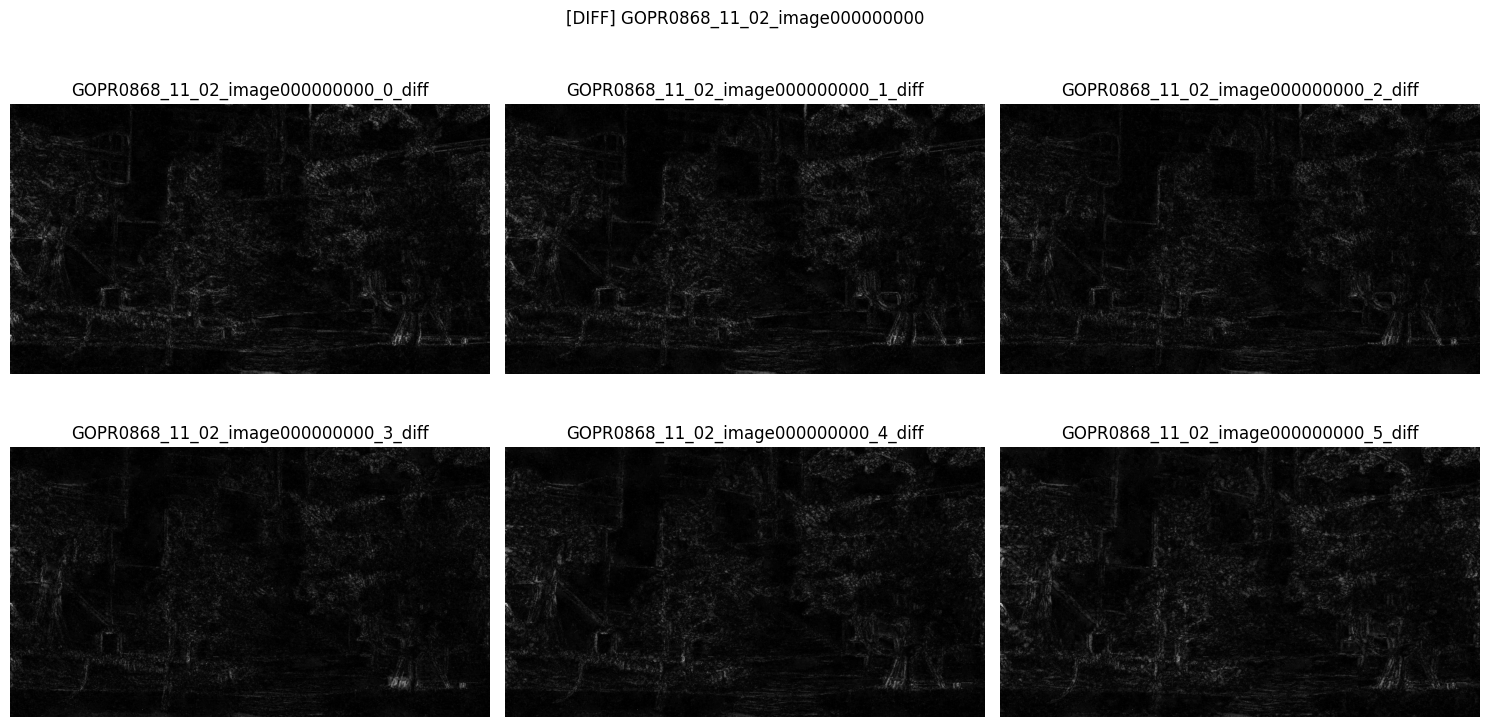

In [33]:
import h5py
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

root_path = '/workspace/data/GOPRO/train'
h5_folder = os.listdir(root_path)
h5_folder.sort()

for h5 in h5_folder[18:]:
    h5_path = os.path.join(root_path, h5)
    h5_name = h5[:-3]   # 예: GOPR0384_11_00
    
    with h5py.File(h5_path, 'r') as f:
        events = f['gen_event']
        voxels = f['voxels']

        for event in events:
            # ------------------------------------------------------------------------------------
            # 1) gen_event 불러오기 (예시는 직접 지정한 npy 파일을 사용)
            # ------------------------------------------------------------------------------------
            gen_event = events[f'{event}'][:]  
            
            # voxel key (event는 "image00000" 형식 가정)
            voxel_key = event.replace('image', 'voxel')
            
            # 다시 [H, W, C] 로 복원
            gen_event = gen_event.transpose(1, 2, 0)
            max_val = np.max(np.abs(gen_event))
            gen_event = gen_event / max_val  # [-1, 1] 정규화

            # ------------------------------------------------------------------------------------
            # 2) GT 이벤트 불러오기
            # ------------------------------------------------------------------------------------
            gt_event = voxels[f'{voxel_key}'][:]
            gt_event = gt_event.transpose(1, 2, 0)
            max_val = np.max(np.abs(gt_event))
            gt_event = gt_event / max_val  # [-1, 1] 정규화

            # ------------------------------------------------------------------------------------
            # 3) RMSE 계산
            # ------------------------------------------------------------------------------------
            diff = gen_event - gt_event
            rmse = np.sqrt(np.mean(diff ** 2))
            print(f"RMSE: {rmse}")

            fig_diff, axs_diff = plt.subplots(2, 3, figsize=(15, 8))
            fig_diff.suptitle(f"[DIFF] {h5_name}_{event}")

            # diff 자체는 [-2, 2] 범위(최대값이 1~-1 사이에서 빼기 때문)일 수 있으므로,
            # 시각화를 위해 절댓값을 취해 [0,1] → [0,255] 로 만들어 줍니다.
            diff_abs = np.abs(diff)
            
            for i in range(6):
                row = i // 3
                col = i % 3

                diff_i = diff_abs[:, :, i]
                diff_i = diff_i / diff_i.max()  # [0,1] 범위로 (혹은 np.max에 따라 에러 방지)
                diff_i = diff_i * 255
                diff_i = diff_i.astype('uint8')

                axs_diff[row, col].imshow(diff_i, cmap='gray')
                axs_diff[row, col].set_title(f'{h5_name}_{event}_{i}_diff')
                axs_diff[row, col].axis('off')

            plt.tight_layout()
            plt.show()

            # 단일 이벤트만 확인 후 종료
            break

        # 단일 h5 파일만 확인 후 종료
        break
    
    # 상위 for 루프(파일 목록)도 한번만 테스트 시 break
    break


In [5]:
test_mother_path = '/workspace/data/LOLBlur/test'
blur_path = os.path.join(test_mother_path, 'low_blur')

scene_folder = os.listdir(blur_path)
scene_folder.sort()

with open('dataset/paths/LOLBlur_test.txt', 'a') as f:

    for scene in scene_folder:
        blur_imgs = os.listdir(os.path.join(blur_path, scene))
        blur_imgs.sort()
        for blur in blur_imgs:
            blur_img_path = os.path.join(blur_path, scene, blur)
            f.write(f'{blur_img_path}\n')
            

In [2]:
test_mother_path = '/workspace/data/LOLBlur/train'
blur_path = os.path.join(test_mother_path, 'low_blur')

scene_folder = os.listdir(blur_path)
scene_folder.sort()

with open('dataset/paths/LOLBlur_train.txt', 'a') as f:

    for scene in scene_folder:
        blur_imgs = os.listdir(os.path.join(blur_path, scene))
        blur_imgs.sort()
        for blur in blur_imgs:
            blur_img_path = os.path.join(blur_path, scene, blur)
            f.write(f'{blur_img_path}\n')
            